<a href="https://colab.research.google.com/github/yoobyoungcheol/-IT-Python-/blob/master/%EC%8B%AC%EC%B8%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 인공 신경망에 층을 추가하여 데이터셋을 분류하면 딥 -> 심층신경망

# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤시드를 사용하고
# 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [2]:
from tensorflow import keras
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
from sklearn.model_selection import train_test_split

# 0~255 까지의 픽셀 값을 0~1로 만들어줌
train_scaled = train_input /255.0
# 28*28의 2차원 배열을 1차원 배열로 펼침
train_scaled = train_scaled.reshape(-1,28*28)

train_scaled, val_scaled, train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

print(test_input.shape,test_target.shape)

(10000, 28, 28) (10000,)


In [4]:
print(train_scaled.shape,train_target.shape)

(48000, 784) (48000,)


In [5]:
print(val_scaled.shape,val_target.shape)

(12000, 784) (12000,)


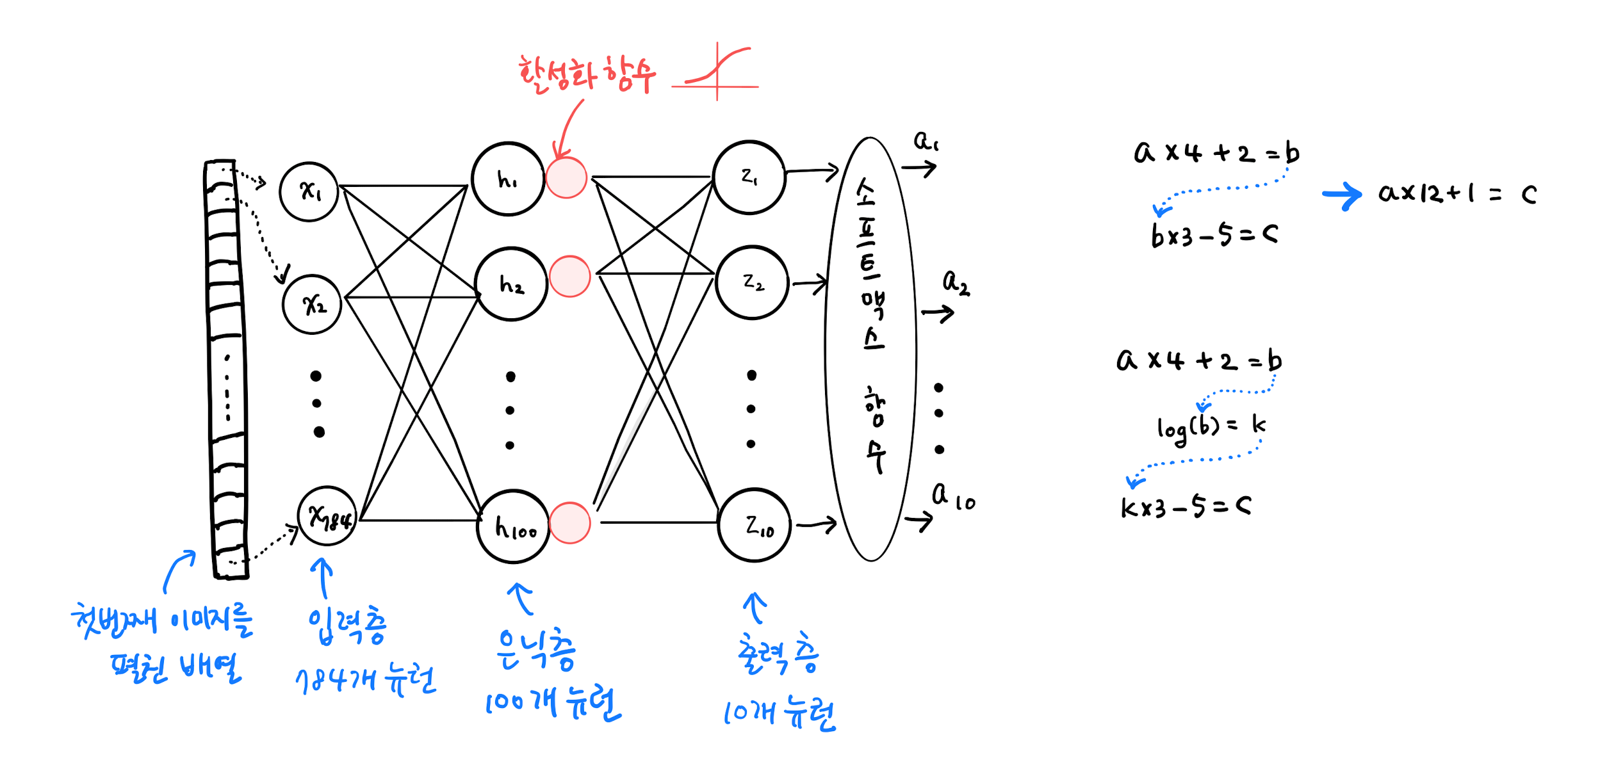

In [6]:
# 인공신경망 모델에 2개의 레이어를 추가해 보겠다
# 전에 만든 신경망 모델과 다른 점은 입력층과 출력층 사이에 밀집 층이 추가된 것
#       -> 은닉층 (Hidden layar)
# 은닉층에는 주황색원으로 활성화 함수가 표시되어 있다
# 출력층이 적용하는 활성화 함수는 종류가 제한되어 있음
#   이진분류(시그모이드함수), 다중분류(소프트맥스함수)-> 분류를 위한
#   은닉층은 활성화 함수가 자유롭다. (대표적 : 시그모이드함수 볼 랭루 함수...)
# a*4+2*b ->b*3-5=c 라고 했을 때 b가 하는 일은 임시용 -> a*12+1=c

# 신경망도 마찬가지로 은닉층에서 선형적인 산술 계산만 수행한다면 수행할 역할이 없는셈
# 선형 계산을 적당하게 비선형적으로 비틀어 줘야함
# 그래야 다음 층의 계산과 단순이 합쳐지지않고 나음의 역활을 할 수 있다.
# a*4+2*b -> log(b)=k -> k*3-5=c 라고 했을 때 log(b)=k 가 하는 일은?

In [7]:
# 시그모이드 활성화 함수를 사용한 은닉층과 소프트맥스함수를 사용한 출력층을 케라스 danse클래스로 만들어보자
danse1 = keras.layers.Dense(100,activation='sigmoid',input_shape=(784,))
# input_shape=(784,) 입력크기(필수)

# danse1 이 은닉층이고 100개의 뉴런을 가진 밀집층, 활성화 함수를 시그모이드로 설정
# 몇개의 뉴런이 필요할지는 경험적으로 기입
# 제약사항으로는 적어도 출력층의 뉴런보다는 많게 만들어야 한다
# (클래스 10개에 대한 확률을 예측해야하는데 은닉층의 뉴런이 10개이하면 안된다)

danse2 = keras.layers.Dense(10,activation='softmax')
# danse2 는 출력층으로 설정 (10개의 클래스를 분류하므로 10개의 뉴런을 둠)
# 활성화 함수로 소프트맥스 함수를 지정

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# 심층 신경망 만들기
model = keras.Sequential([danse1,danse2])

# 위에서 만든 danse1,danse2를 Sequential클래스에 추가하영 심층(deep)신경망을 만듬
# danse1,danse2를 리스트로 만들어 전달함
# 주의 : 뒤에가 출력층임으로 danse2를 설정
# 인공 신경망의 강력한 성능은 층을 추가하여 입력데이터에 대해
# 연속적인 학습을 진행하는 능력 -> 2개이상 층을 추가 가능

In [9]:
model.summary() # 층에 대한 유용한 정보가 나옴
# 맨 첫줄에 모델의 이름
# 그 다음 이모델이 들어 있는 층이 순서대로 나옴
# 맨 처음 추가한 은닉층에서 출력층의 순서대로 나옴
# 층이름(클래스), 출력크기, 모델 파라미터개수
# 층이름을 지정하지않으면 케라스가 자동으로 danse 라고 이름을 붙임
# 출력크기 (None(샘플의개수: 아직 정의되지않음),100)
#           -> 케라스 모델의 fit()매서드에 훈련데이터를 주입하면
#               이데이터를 한번에 모두 사용하지않고 잘게 나누어
#               여러번에 걸쳐 경사 하강법 단계를 수행 (미니배치 경사 하강법)
#               케라스의 기본 미니배치 그기는 32개임

# 이 값은 fot()매서드에서 batch_size 매개변수로 변경가능 따라서
# 샘플 개수를 교정하지 않고 어떤 배치 크기에도 유연하게[ 대응할 수 있도록 None으로 설정이 최선

# 신경망 층에서 입력되거나 출력되는 배열의 첫 번쨰 차원을 배치 자원이라고 부름

# 출력크기 (None,100 -> 은닉층의 뉴런 개수를 100개임으로 100개의 출력이 나옴)
#  -> 샘플마다 784개의 픽셀값이 은닉층을 통과하면서 100개의 특성으로 압충
#       마지막으로 파라미터 개수가 출력되; 784 * 100 + 100 = 78500

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# 두번째 층의 출력 크기 (None,10) -> 뉴런 개수 가 10개임
# 파라미터는 100 * 10 + 10 = 1010

# 맨 아래 있는 Non-trainable params: 0  (0.00 B) 훈련되지 않은 파라미터
# (간혹 경사 하강법으로 훈련되지 않는 파라미터를 가진 층의 파라미터# 두번째 층의 출력 크기 (None,10) -> 뉴런 개수 가 10개임
# 파라미터는 100 * 10 + 10 = 1010

# 맨 아래 있는 Non-trainable params: 0  (0.00 B) 훈련되지 않은 파라미터
# (간혹 경사 하강법으로 훈련되지 않는 파라미터를 가진 층의 파라미터

In [11]:
# 두 번째 심층 만드는 방법

# Sequential 클래스에 층을 추가하는 다른 방법
# 앞에 2개의 Danse는 따로 저장하여 쓸일이 없기 때문에
# 아래 코드처럼 Sequential 클래스의 생성자 안에서 따로 Danse클래스의 객체를 만드는 경우가 많다.

model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
                                                # name='hidden' 레이어 이름 정의(영어만!)
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')
model.summary()

Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# 층(layar) 추가시 가장 편한 방법은 add()를 사용한다.
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# 모델 훈련 시작
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(train_scaled,train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7525 - loss: 0.7720
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8463 - loss: 0.4270
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8604 - loss: 0.3857
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8696 - loss: 0.3600
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8759 - loss: 0.3410


In [14]:
# 한개의 층으로만 돌렸을때에는 정확도가 85.37%
# 두개의 층으로 돌렸을때에는 정확도가 87.47%
# 레이어를 늘려 했을때 보다 정확도가 올라갔다.

In [15]:
# 훈련결과를 보면 훈련세트에 대한 성능이 추가된 층이 성능을 향상시켰다 라는것을 잘알수있다 검증역시 해보자
model.evaluate(val_scaled,val_target) # 검증 점수 86.84%

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8733 - loss: 0.3530


[0.35684970021247864, 0.8694999814033508]

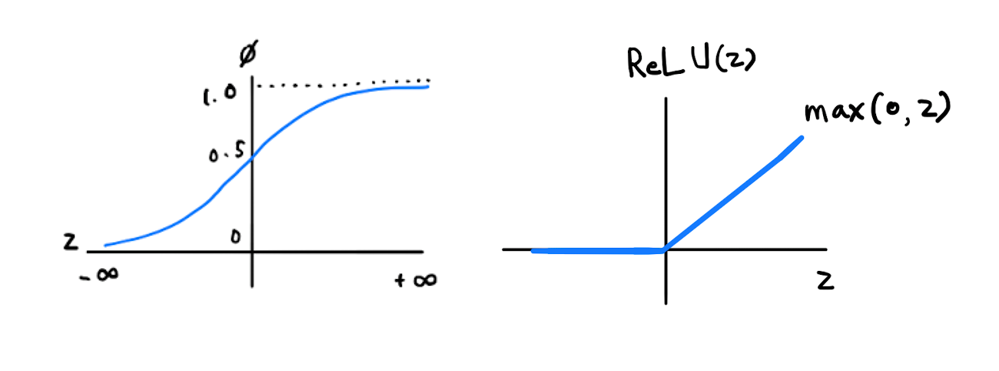

In [16]:
# 초창기 인공 신경망의 은닉층에서 많이 사용된 활성화 함수는 시그모이드 함수였지만
# 단점이 오른쪽, 윈쪽 끝으로 갈수록 그래프가 누워 올바른 출력을 만드는데 신속하게 대응하지 못한다
# 특히 층이 많은 심층 신경망 일수록 그 효과가 누적되어 학습을 더 어렵게 만듬

# 개선을 위해서 다른 종류의 활성화함수가 제안되었는데 바로 렐루(RelU) 함수임
# 렐루 함수는 입력이 양수 일 경우 마치 활성화 함수가 없는 것 처럼
# 그냥 입력을 통과시키고 음수일 경우 0으로 만든다
# 렐루 함수는 max(0,z)와 같이 씀 -> z가 0보다 크면 z를 출력하고 0보다 작으면 0을 출력

# 렐루 함수는 특히 이미지 처리에 좋은 성능을 낸다고 함
# 은닉층에 활성화 함수에 시그모이드 함수 대신 렐루 함수를 적용하기 전에

# 케라스에서 제공하는 편리한 층 하나가 있다 -> Flatten
# Flatten(플래튼) : 단조롭게하다
# 클래스는 배치 자원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할만 함 (가중치,정편 없음)

# 절편 : 직선이 y축과 만나는 점의 x좌표(x절편) 및 y축과 만나는 점의 y좌표(y절편)을 통틀어 이르는 말
# 하지만 플래튼 클래스를 층처럼 입력층과 은닉층 사이에 추가하기 때문에 이를 층이라고 부른다
# 입력층 바로 뒤에 플래튼 층 추가

In [17]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28))) # 입력층 바로 뒤에 플래튼 층 추가
# 플래튼 클래스에 포함된 파라미터는 0개로 케라스의 플래튼 층을 신경망 모델에 추가하면
# 입력값의 차원을 짐작할 수 있는 것이 장점이 된다

# (None, 784)  -> 784개의 입력이 첫번째 은닉층에 전달됨을 알 수 있다
model.add(keras.layers.Dense(100, activation='relu'))       # 렐루 층      True or False 를 1단계에서 수행함
model.add(keras.layers.Dense(10, activation='softmax'))    # 소프트맥스 층          # 다중분류
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# 훈련 데이터를 준비해서 모델 훈련 시작
# reshape() 매서드 제외 : 2차원 해상도 값을 그대로 사용해 보기 위함
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255

train_scaled, val_scaled, train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)


In [19]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_scaled,train_target,epochs=5) # 전과 비교해보면 조금 향상됨

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7637 - loss: 0.6723
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8519 - loss: 0.4061
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8685 - loss: 0.3613
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8800 - loss: 0.3340
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8874 - loss: 0.3157


In [20]:
model.evaluate(val_scaled,val_target)# 검증 점수 전 (86.84%)과 비교해보면 조금 떨어짐 ,,,,....???????

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8651 - loss: 0.3861


[0.38933488726615906, 0.8648333549499512]

In [22]:
#  옵티마이져 : 최적화

# 하피어파라미터는 모델이 학습하지 않아 사람이 지정해 주어야 하는 파라미터
# 신경망에는 특히 하이퍼파라미터가 많다
# 전에는 하나의 은닉층을 추가하였지만 여러 개의 은닉층을 추가할 수도 있다
# 추가할 은닉층의 개수는 모델이 학습하는 것이 아니라 우리가 지정해 주어야할 하이퍼파라미터이다
# 은닉층의 뉴런 개수도 우리가 지정하는 것이 하이퍼파라미터이다 (활성화 함수 층의 종류 포함)

# 케라스는 기본적으로 미니배치 경사하강법을 사용하며 미니배치 개수는 32개 라고했다.,
# 이를 조정하는 batch_size로 하이퍼파라미터
# fir() 매서드의 epochs(에포크) : 중요한 사건지점  매개변수도 하이퍼파라미터임
#   -> 반복한 횟수에 따라 다른 모델이 만들어짐

# 마지막으로 compile() 매서드에서는 케라스의 기본 경사 하강법 알고리즘인
#  RMSprop(Root Mean Sqaure Propagation의 약자로 알엠에스프롭(R.M.S.Prio)라고 읽습니다)
# 케라스는 다양한 종류의 경사하강법을 제공하는데 이를 옵티마이져(optimizer: 최적화) 라고 부름
# -> 학습률 또한 조정할 하이퍼파라미터임

# 처음부터 모델을 구성하고 각종 하이퍼파라미터의 최적값을 찾는 것은 어려운 작업이다

# 옵티마이져 테스트1 -> 확률적 경사 하강법 SGD
# (1개의 샘플을 뽑아 훈련하지 않고 앞서 언급한 것 처럼 기본적인 미니 배치를 사용)

sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# optimizer = sgd    자동으로 클래스를 객체로 만들고 시작함 sgd = keras.optimizers.SGD()     생략 가능

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
sgd = keras.optimizers.SGD(learning_rate=0.1) # learning_rate=0.1 원하는 학습을 기록 (기본값이 0.01)

# 아래 그림처럼 다양한 최적화 기법이 존재한다
sgd = keras.optimizers.SGD(momentum=0.9,nesterov=True)           # 모델 최적화 코드 ★
# 모멘텀(기본값 0 : 그레이디언트 가속도 0.9이상 사용)
# 네스테로프 모멘텀(네스테로프 모멘텀 최적화 = 가속검사)
# 네스테로프 모멘텀은 모멘텀 최적화를 2번 반복하여 구현한다
#    -> 기본 확률적 경사 하강법보바 더 나은 성능을 제공

# 모델이 최적점에 가까이 갈수록 학습률을 낮출수도 있다
#     -> 안정적으로 최적점에 수렴 ( 적응적 학습률 : adaptive learning rate)
# 학습률 매개변수를 튜닝하는 수고를 줄여줌

# 적응적 학습률 : adaptive learning rate를 사용하는 대표적인 최적화기법은 Adagrad RMSprop가 있다
# compile()메서드의 optimizer = adagrad,  optimizer = rmsprop(기본값)

adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

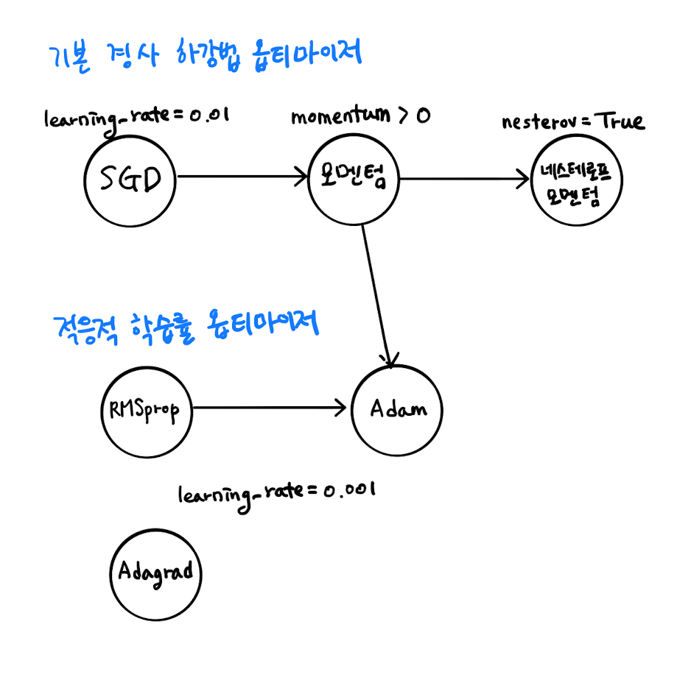

In [26]:
ramsprop = keras.optimizers.RMSprop()
model.compile(optimizer=ramsprop, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
model = keras.Sequential()                                  # 딥러닝의 레이어 생성
model.add(keras.layers.Flatten(input_shape=(28,28)))        # 입력층 (1차원 변환 없이 사용)
model.add(keras.layers.Dense(100,activation='relu'))        # 은닉층 (렐루)
model.add(keras.layers.Dense(10,activation='softmax'))      # 출력층(소프트맥스)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer='adagrad', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 적응적 학습률 최적화
model.fit(train_scaled,train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8986 - loss: 0.2788
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9053 - loss: 0.2608
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9070 - loss: 0.2570
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9081 - loss: 0.2549
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9084 - loss: 0.2534


In [33]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 적응적 학습률 최적화
model.fit(train_scaled,train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8931 - loss: 0.2999
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8980 - loss: 0.2876
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9035 - loss: 0.2758
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9072 - loss: 0.2675
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9104 - loss: 0.2601


In [34]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# adam : 모멘텀 최적화와 RMSprop의 장점을 접목한 기법
model.fit(train_scaled,train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9030 - loss: 0.2673
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9097 - loss: 0.2466
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9141 - loss: 0.2329
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9173 - loss: 0.2234
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9219 - loss: 0.2120


In [35]:
model.evaluate(val_scaled,val_target) # 검증점수 출력

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8825 - loss: 0.3678


[0.3795534372329712, 0.8816666603088379]

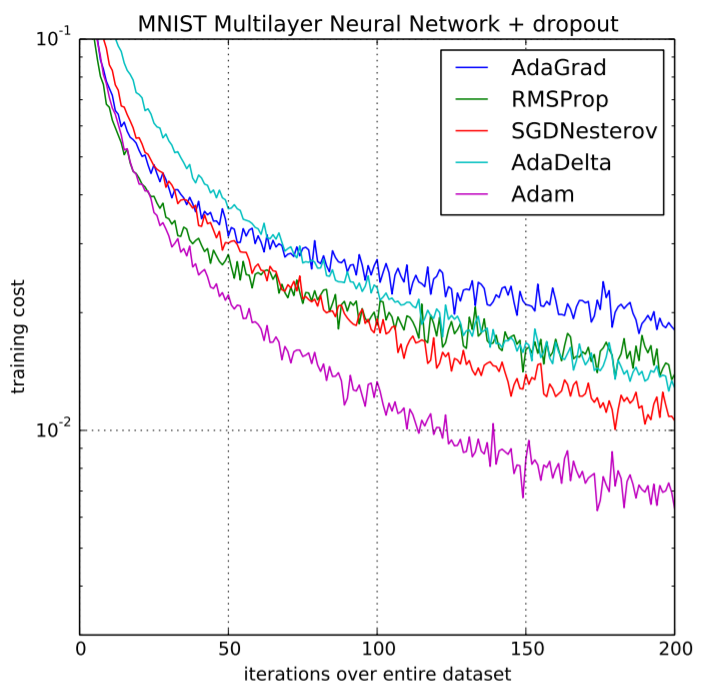